<a href="https://colab.research.google.com/github/rxramir/rxramir/blob/main/SSAI_ML_Entrance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:** Find an accurate model to predict chlorophyll - a 

**Label:** Concentration of chlorophyll-a (unit)

**Feature:** Wavelengths (nm)


In [2]:
#@title Run on TensorFlow 2.x
# %tensorflow_version 2.8

#@title Import modules
import pandas as pd
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:e}".format

In [3]:
# Reading csv files using pandas
testing = pd.read_csv("testing.csv")
training = pd.read_csv("training.csv")
validation = pd.read_csv("validation.csv")

In [4]:
# Initial data observations
training.head(20)

,# 400,412.5,442.5,490,510,560,620,665,673.75,681.25,708.75,753.75,761.25,764.375,767.5,778.75,Chl
0,5.214900e-03,5.279400e-03,4.702400e-03,3.749800e-03,2.496700e-03,1.368200e-03,2.732300e-04,1.512500e-04,1.606800e-04,1.695800e-04,6.950100e-05,1.806700e-05,1.768600e-05,1.760900e-05,1.756800e-05,1.776700e-05,1.000000e-01
1,5.349300e-03,5.583700e-03,5.901800e-03,5.895000e-03,4.554000e-03,3.101600e-03,7.111000e-04,4.112900e-04,4.012200e-04,3.957700e-04,1.966000e-04,5.590000e-05,5.470900e-05,5.440800e-05,5.449700e-05,5.632200e-05,1.000000e-01
2,5.471800e-03,5.788500e-03,6.571500e-03,7.181900e-03,6.025200e-03,4.658300e-03,1.150300e-03,6.719700e-04,6.418000e-04,6.214900e-04,3.238600e-04,9.375400e-05,9.175100e-05,9.122800e-05,9.144600e-05,9.490000e-05,1.000000e-01
3,5.557500e-03,5.921000e-03,6.985100e-03,8.014600e-03,7.096900e-03,6.020600e-03,1.590100e-03,9.334400e-04,8.829200e-04,8.475300e-04,4.513300e-04,1.316300e-04,1.288100e-04,1.280600e-04,1.284100e-04,1.335000e-04,1.000000e-01
4,5.618700e-03,6.012200e-03,7.263700e-03,8.593000e-03,7.904100e-03,7.203700e-03,2.029300e-03,1.195600e-03,1.124700e-03,1.074100e-03,5.790500e-04,1.695200e-04,1.659000e-04,1.649300e-04,1.654100e-04,1.721300e-04,1.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,5.156800e-03,5.366300e-03,5.823800e-03,6.533000e-03,5.693300e-03,4.691700e-03,1.204600e-03,7.214800e-04,7.292200e-04,7.477200e-04,3.503800e-04,9.945000e-05,9.738800e-05,9.685700e-05,9.712200e-05,1.009300e-04,3.000000e-01
16,3.427900e-03,3.620300e-03,4.141300e-03,5.025600e-03,4.676800e-03,4.227300e-03,1.198800e-03,7.186100e-04,7.210800e-04,7.352200e-04,3.499700e-04,9.959200e-05,9.754600e-05,9.702300e-05,9.726700e-05,1.009900e-04,3.000000e-01
17,5.295900e-03,5.567600e-03,6.321200e-03,7.386500e-03,6.724200e-03,6.002200e-03,1.641100e-03,9.788600e-04,9.652300e-04,9.693200e-04,4.778700e-04,1.373300e-04,1.344600e-04,1.337000e-04,1.341000e-04,1.395400e-04,3.000000e-01
18,3.753100e-03,3.998400e-03,4.732800e-03,5.898400e-03,5.646100e-03,5.427900e-03,1.625700e-03,9.738000e-04,9.558000e-04,9.561700e-04,4.770800e-04,1.374500e-04,1.345900e-04,1.338500e-04,1.342200e-04,1.395800e-04,3.000000e-01


In [5]:
training.describe()
# Wavelength Cheet sheet
    # Red (limit): 700nm
    # Red: 650nm
    # Orange: 600nm
    # Yellow: 580nm
    # Green: 550nm
    # Cyan: 500nm
    # Blue: 450nm
    # Violet (limit): 400nm
# Expect as chlorophyl concentration increases the amount of green light wavelengths 
# will increase while the amount of violet and orange wavelengths detected will decrease. 
# Possibly good features: Violet (400nm), Green (560nm), Orange (600nm)

,# 400,412.5,442.5,490,510,560,620,665,673.75,681.25,708.75,753.75,761.25,764.375,767.5,778.75,Chl
count,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05,7.063390e+05
mean,3.981080e-03,4.371063e-03,5.521332e-03,8.944031e-03,1.143955e-02,1.930178e-02,1.622225e-02,1.124155e-02,1.010098e-02,1.051539e-02,1.084157e-02,4.420674e-03,4.345293e-03,4.325303e-03,4.340955e-03,4.515851e-03,1.809001e+01
std,3.718991e-03,3.969553e-03,4.962667e-03,7.403907e-03,8.682528e-03,1.283721e-02,1.263657e-02,9.804005e-03,8.946696e-03,9.065247e-03,1.019604e-02,4.506887e-03,4.430785e-03,4.410260e-03,4.425731e-03,4.600634e-03,1.900712e+01
min,1.266800e-04,1.868200e-04,3.450500e-04,5.794600e-04,7.119800e-04,9.762000e-04,1.526900e-04,7.110100e-05,6.604800e-05,6.128200e-05,3.222700e-05,7.977900e-06,8.298800e-06,8.489900e-06,8.232100e-06,7.180600e-06,1.000000e-02
25%,1.974600e-03,2.224200e-03,2.694700e-03,4.193500e-03,5.746800e-03,1.013900e-02,6.700300e-03,4.266450e-03,4.076600e-03,4.437800e-03,3.264800e-03,1.147700e-03,1.129100e-03,1.123900e-03,1.128300e-03,1.177700e-03,4.900000e+00
50%,2.941800e-03,3.236800e-03,4.034600e-03,6.748900e-03,9.077100e-03,1.672900e-02,1.195200e-02,7.450100e-03,6.659900e-03,6.817900e-03,6.397300e-03,3.147800e-03,3.092500e-03,3.077800e-03,3.089300e-03,3.212700e-03,1.170000e+01
75%,4.532650e-03,5.013800e-03,6.503800e-03,1.107200e-02,1.492800e-02,2.802400e-02,2.504200e-02,1.654600e-02,1.429800e-02,1.501100e-02,1.633300e-02,5.711850e-03,5.599100e-03,5.568850e-03,5.593500e-03,5.856100e-03,2.525000e+01
max,3.459800e-02,3.665000e-02,4.400600e-02,5.667400e-02,6.079200e-02,7.007700e-02,6.200300e-02,5.270500e-02,5.112400e-02,5.147200e-02,4.695100e-02,2.306700e-02,2.268800e-02,2.258100e-02,2.263200e-02,2.332800e-02,9.880000e+01


In [6]:
# Generate a correlation matrix
training.corr()

,# 400,412.5,442.5,490,510,560,620,665,673.75,681.25,708.75,753.75,761.25,764.375,767.5,778.75,Chl
# 400,1.000000e+00,9.957725e-01,9.364193e-01,8.396087e-01,7.768838e-01,5.801076e-01,4.918952e-01,5.503956e-01,5.653190e-01,5.516953e-01,4.733432e-01,4.618220e-01,4.610937e-01,4.608031e-01,4.605529e-01,4.597851e-01,-1.415133e-01
412.5,9.957725e-01,1.000000e+00,9.631309e-01,8.813069e-01,8.232004e-01,6.316756e-01,5.451558e-01,6.019543e-01,6.169411e-01,6.035084e-01,5.155688e-01,4.992048e-01,4.983881e-01,4.980675e-01,4.978046e-01,4.970549e-01,-1.458497e-01
442.5,9.364193e-01,9.631309e-01,1.000000e+00,9.705633e-01,9.263537e-01,7.545575e-01,6.820579e-01,7.397795e-01,7.560179e-01,7.422912e-01,6.260687e-01,5.971931e-01,5.961848e-01,5.958058e-01,5.955376e-01,5.949663e-01,-1.584133e-01
490,8.396087e-01,8.813069e-01,9.705633e-01,1.000000e+00,9.834175e-01,8.526667e-01,7.729105e-01,8.166503e-01,8.287717e-01,8.181526e-01,7.010000e-01,6.591126e-01,6.579561e-01,6.575381e-01,6.572976e-01,6.570389e-01,-1.207177e-01
510,7.768838e-01,8.232004e-01,9.263537e-01,9.834175e-01,1.000000e+00,9.268805e-01,8.338151e-01,8.490673e-01,8.525333e-01,8.487974e-01,7.533321e-01,6.971682e-01,6.959236e-01,6.954949e-01,6.953378e-01,6.956501e-01,-4.122506e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761.25,4.610937e-01,4.983881e-01,5.961848e-01,6.579561e-01,6.959236e-01,7.638522e-01,8.692446e-01,8.837986e-01,8.635408e-01,8.785937e-01,9.757922e-01,9.999935e-01,1.000000e+00,9.999992e-01,9.999970e-01,9.999339e-01,3.764309e-01
764.375,4.608031e-01,4.980675e-01,5.958058e-01,6.575381e-01,6.954949e-01,7.634777e-01,8.689697e-01,8.835267e-01,8.632553e-01,8.783136e-01,9.756687e-01,9.999883e-01,9.999992e-01,1.000000e+00,9.999987e-01,9.999369e-01,3.768471e-01
767.5,4.605529e-01,4.978046e-01,5.955376e-01,6.572976e-01,6.953378e-01,7.635808e-01,8.690617e-01,8.834786e-01,8.631531e-01,8.782550e-01,9.758471e-01,9.999852e-01,9.999970e-01,9.999987e-01,1.000000e+00,9.999527e-01,3.772681e-01
778.75,4.597851e-01,4.970549e-01,5.949663e-01,6.570389e-01,6.956501e-01,7.654248e-01,8.705722e-01,8.840649e-01,8.634314e-01,8.787969e-01,9.773770e-01,9.999282e-01,9.999339e-01,9.999369e-01,9.999527e-01,1.000000e+00,3.785305e-01


In [7]:
#creating bool series True for NaN values for Chl
bool_training_Chl = pd.notnull(training["Chl"])
# creating bool series True for NaN values 
#bool_training = pd.notnull(bool_training_Chl["560"])

# filtering data 
# displayind data only with 560 = Not NaN 
training[bool_training_Chl] 

,# 400,412.5,442.5,490,510,560,620,665,673.75,681.25,708.75,753.75,761.25,764.375,767.5,778.75,Chl
0,5.214900e-03,5.279400e-03,4.702400e-03,3.749800e-03,2.496700e-03,1.368200e-03,2.732300e-04,1.512500e-04,1.606800e-04,1.695800e-04,6.950100e-05,1.806700e-05,1.768600e-05,1.760900e-05,1.756800e-05,1.776700e-05,1.000000e-01
1,5.349300e-03,5.583700e-03,5.901800e-03,5.895000e-03,4.554000e-03,3.101600e-03,7.111000e-04,4.112900e-04,4.012200e-04,3.957700e-04,1.966000e-04,5.590000e-05,5.470900e-05,5.440800e-05,5.449700e-05,5.632200e-05,1.000000e-01
2,5.471800e-03,5.788500e-03,6.571500e-03,7.181900e-03,6.025200e-03,4.658300e-03,1.150300e-03,6.719700e-04,6.418000e-04,6.214900e-04,3.238600e-04,9.375400e-05,9.175100e-05,9.122800e-05,9.144600e-05,9.490000e-05,1.000000e-01
3,5.557500e-03,5.921000e-03,6.985100e-03,8.014600e-03,7.096900e-03,6.020600e-03,1.590100e-03,9.334400e-04,8.829200e-04,8.475300e-04,4.513300e-04,1.316300e-04,1.288100e-04,1.280600e-04,1.284100e-04,1.335000e-04,1.000000e-01
4,5.618700e-03,6.012200e-03,7.263700e-03,8.593000e-03,7.904100e-03,7.203700e-03,2.029300e-03,1.195600e-03,1.124700e-03,1.074100e-03,5.790500e-04,1.695200e-04,1.659000e-04,1.649300e-04,1.654100e-04,1.721300e-04,1.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706334,2.366600e-03,2.918000e-03,4.428500e-03,7.968700e-03,1.291200e-02,2.700200e-02,2.502900e-02,1.492000e-02,1.303500e-02,1.460900e-02,1.793200e-02,6.434000e-03,6.305100e-03,6.270400e-03,6.294500e-03,6.573900e-03,2.800000e+01
706335,2.307400e-03,2.853200e-03,4.368300e-03,7.919400e-03,1.284300e-02,2.693500e-02,2.501700e-02,1.491900e-02,1.303400e-02,1.461000e-02,1.793300e-02,6.434000e-03,6.305200e-03,6.270400e-03,6.294500e-03,6.573900e-03,2.800000e+01
706336,2.251000e-03,2.791200e-03,4.309600e-03,7.870700e-03,1.277400e-02,2.686700e-02,2.500500e-02,1.491700e-02,1.303300e-02,1.461400e-02,1.792900e-02,6.433900e-03,6.305100e-03,6.270400e-03,6.294500e-03,6.573900e-03,2.800000e+01
706337,2.197300e-03,2.731800e-03,4.252500e-03,7.822500e-03,1.270600e-02,2.680100e-02,2.499300e-02,1.491500e-02,1.303200e-02,1.460900e-02,1.793100e-02,6.433900e-03,6.305100e-03,6.270300e-03,6.294400e-03,6.573900e-03,2.800000e+01


In [8]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [9]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/200
7064/7064 [==============================] - 11s 1ms/step - loss: 387.4979 - root_mean_squared_error: 19.6850
Epoch 2/200
7064/7064 [==============================] - 10s 1ms/step - loss: 355.0663 - root_mean_squared_error: 18.8432
Epoch 3/200
7064/7064 [==============================] - 10s 1ms/step - loss: 351.2574 - root_mean_squared_error: 18.7419
Epoch 4/200
7064/7064 [==============================] - 10s 1ms/step - loss: 347.6409 - root_mean_squared_error: 18.6451
Epoch 5/200
7064/7064 [==============================] - 10s 1ms/step - loss: 344.2184 - root_mean_squared_error: 18.5531
Epoch 6/200
7064/7064 [==============================] - 10s 1ms/step - loss: 340.9895 - root_mean_squared_error: 18.4659
Epoch 7/200
7064/7064 [==============================] - 10s 1ms/step - loss: 337.9766 - root_mean_squared_error: 18.3841
Epoch 8/200
7064/7064 [==============================] - 10s 1ms/step - loss: 335.1325 - root_mean_squared_error: 18.3066
Epoch 9/200
7064/7064 [=

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


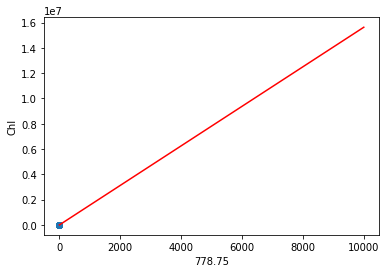

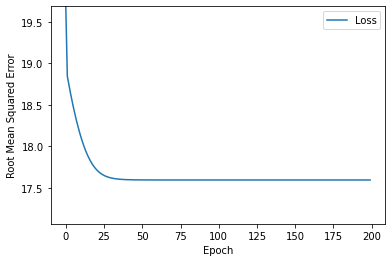

In [14]:
# The following variables are the hyperparameters
learning_rate = 0.01
epochs = 200
batch_size = 100

# Start with Green wavelengths to test correlation since it has the one of the largest stds
# Might be more precise?
#my_feature = "560" # Wavelength in nm

# Using a correlation matrix it seems the strongest correlation Chl has is with 778.75
my_feature = "778.75" # Wavelength in nm
my_label = "Chl" # Chlorophyll-a concentration

# Discard any pre-existing version of the model
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training[bool_training_Chl], my_feature, my_label, epochs, batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)